# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 1 Solutions</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Hai Nguyen</center></h1>

## **Question 1** (Linear regression for 2 linear features)

Loading UCI Diabetes Dataset and considering the *BMI* and *BP* features, denoted as $x_1, x_2$, respectively. The diabetes risk score is the target and denoted as $y$. We assuming the linear model has the form of

$$ \bar{y} = 0.4638 + \theta_1 x_1 + \theta_2 x_2.$$

The mean square error loss function

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients, $y^i$ is the data for the $i$ th patient, and $\bar{y}^{(i)} = 0.4638 + \theta_1 x_1^i + \theta_2 x_2^i$. 

- (1.a) (+25 pt) Using the gradient descent algorithm to find the optimal $\theta_1$ and $\theta_2$. You need to use the pseudo code below as the skeleton/blueprint for your codes.

- (1.b) (+5 pt) Plotting the contours of the loss function over the square domain $[0,4]^2$

- (1.c) (+10 pt) Plotting  the history the gradient descent vector on the contour map from two initial guess $(\theta_1, \theta_2) = (4,4)$ and $(\theta_1, \theta_2) = (0,0)$. You can plot a vector for every 100 iterations.

## Solutions for Q1: 

### (1.a)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta) + 0.4638

def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# # add an extra column of onens
# X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([4,4]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 10000 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1
    
print(' Optimal solutions is : %.4f and %.4f' % (theta[0], theta[1]))

Iteration 0. MSE: 0.030014
Iteration 10000. MSE: 0.012079
Iteration 20000. MSE: 0.012073
 Optimal solutions is : 3.6106 and 0.2301


### (1.b)

In [13]:
mesh_points = 101
theta1_grid = np.linspace(0,4,mesh_points)
theta2_grid = np.linspace(4,0,mesh_points)

theta_1_cordinate, theta_2_cordinate = np.meshgrid(theta1_grid,theta2_grid)
loss_value = np.zeros((mesh_points, mesh_points))

for i in range(mesh_points):
    for j in range(mesh_points):
        loss_value[i,j] = mean_squared_error((theta_1_cordinate[i,j],theta_2_cordinate[i,j]) , X_train, y_train)

Text(0.5, 1.0, 'Contour map of MSE loss')

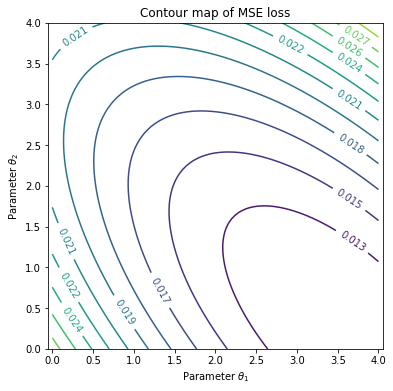

In [14]:
plt.figure(figsize=(6,6))
contours = plt.contour(theta_1_cordinate, theta_2_cordinate, loss_value, 15)
plt.clabel(contours)
plt.xlim((0,4)), plt.xlabel('Parameter ' + r'$\theta_1$')
plt.ylim((0,4)), plt.ylabel('Parameter ' + r'$\theta_2$')
plt.axis('equal')
plt.title('Contour map of MSE loss')

### (1.c) 

In [15]:
theta, theta_prev = np.array([4,4]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

theta_saved = theta
gradient_saved = []
while np.linalg.norm(theta - theta_prev) > threshold:    
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    
    if iter % 200 == 0:
        theta_saved = np.concatenate((theta_saved, theta), axis = 0)
        gradient_saved = np.concatenate((gradient_saved, gradient), axis = 0)
    
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

point_44 = np.reshape(theta_saved, (-1, 2))
grad_44 = np.reshape(gradient_saved, (-1, 2))

In [16]:
theta, theta_prev = np.array([0,0]), np.array([1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

theta_saved = theta
gradient_saved = []
while np.linalg.norm(theta - theta_prev) > threshold:    
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    
    if iter % 200 == 0:
        theta_saved = np.concatenate((theta_saved, theta), axis = 0)
        gradient_saved = np.concatenate((gradient_saved, gradient), axis = 0)
    
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

point_00 = np.reshape(theta_saved, (-1, 2))
grad_00 = np.reshape(gradient_saved, (-1, 2))

(0.0, 4.0, 0.0, 4.0)

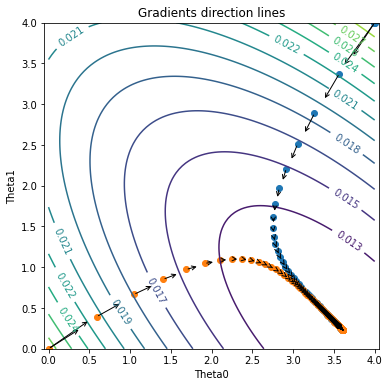

In [17]:
plt.figure(figsize=(6,6))
contours = plt.contour(theta_1_cordinate, theta_2_cordinate, loss_value, 15)
plt.clabel(contours)

line_length = 60

for theta_1, theta_2, grad_theta_1, grad_theta_2 in zip (point_44[:,0], point_44[:,1], grad_44[:,0], grad_44[:,1]):
    plt.annotate('', xytext=(theta_1, theta_2), 
                     xy=(theta_1 - line_length * grad_theta_1, theta_2 - line_length * grad_theta_2),
                     arrowprops={'arrowstyle': '->', 'lw': 1}, va='center', ha='center', color='blue')
plt.scatter(point_44[:,0], point_44[:,1])

for theta_1, theta_2, grad_theta_1, grad_theta_2 in zip (point_00[:,0], point_00[:,1], grad_00[:,0], grad_00[:,1]):
    plt.annotate('', xytext=(theta_1, theta_2), 
                     xy=(theta_1 - line_length * grad_theta_1, theta_2 - line_length * grad_theta_2),
                     arrowprops={'arrowstyle': '->', 'lw': 1}, va='center', ha='center', color='red')
plt.scatter(point_00[:,0], point_00[:,1])

plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients direction lines')
plt.axis('equal')

## **Question 2** (Linear regression for 2 nonlinear features, Multivariate Polynomial Regression)

We still use the pairs of *BMI* and *BP* features ($x_1, x_2$). However, the linear model now is changed to

$$ \bar{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2$$

The mean square error loss function is still the same

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where again $n$ is the number of patients.

- (2.a) (+30 pt) Using the gradient descent algorithm to find the optimal $\theta_i, i = 0, ..., 5$. You need to use the pseudo code below as the skeleton/blueprint for your codes

## Solutions for Q2:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta) + 0.4638

def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# # add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['one', 'bmi', 'bp']]
X_train['bmi x bp'] = X_train['bmi'] * X_train['bp']
X_train['bmi^2'] = X_train['bmi']**2
X_train['bp^2'] = X_train['bp']**2

y_train = y.iloc[-20:] / 300

threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([0,0,0,0,0,0]), np.array([1,1,1,1,1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter > 200000:
        break
    if iter % 10000 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        print(' Optimal solutions is : %.4f, %.4f, %.4f, %.4f, %.4f, %.4f ' % (theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1
    


Iteration 0. MSE: 0.027770
 Optimal solutions is : 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000 
Iteration 10000. MSE: 0.011663
 Optimal solutions is : -0.0106, 3.4766, 0.3333, 0.7607, 0.6758, 0.8039 
Iteration 20000. MSE: 0.011315
 Optimal solutions is : -0.0144, 3.5396, 0.2685, 1.4328, 1.2846, 1.5447 
Iteration 30000. MSE: 0.011008
 Optimal solutions is : -0.0182, 3.5215, 0.2839, 2.0654, 1.8607, 2.2498 
Iteration 40000. MSE: 0.010731
 Optimal solutions is : -0.0218, 3.5002, 0.3026, 2.6629, 2.4065, 2.9225 
Iteration 50000. MSE: 0.010481
 Optimal solutions is : -0.0253, 3.4797, 0.3206, 3.2272, 2.9235, 3.5647 
Iteration 60000. MSE: 0.010256
 Optimal solutions is : -0.0286, 3.4602, 0.3377, 3.7600, 3.4133, 4.1778 
Iteration 70000. MSE: 0.010053
 Optimal solutions is : -0.0317, 3.4418, 0.3539, 4.2629, 3.8773, 4.7633 
Iteration 80000. MSE: 0.009870
 Optimal solutions is : -0.0347, 3.4243, 0.3693, 4.7375, 4.3169, 5.3227 
Iteration 90000. MSE: 0.009705
 Optimal solutions is : -0.0375, 3.407

In [19]:
# print(' Optimal solutions is : %.4f, %.4f, %.4f, %.4f, %.4f, %.4f ' % (theta[0], theta[1], theta[2], theta[3], theta[4], theta[5]))
display = lambda x : print('the optimal ' + r'$\theta$' + '_' + str(x) + ' is ' + '%.3f' %(theta[x]))
[display(x) for x in np.array((0,1,2,3,4,5))]

the optimal $\theta$_0 is -0.061
the optimal $\theta$_1 is 3.274
the optimal $\theta$_2 is 0.503
the optimal $\theta$_3 is 8.683
the optimal $\theta$_4 is 8.085
the optimal $\theta$_5 is 10.409


[None, None, None, None, None, None]

## **Question 3** (Linear regression for 2 nonlinear features)

Now instead of using gradient descent in question 2, you shall use the ordinary least squares approach to 

- (3.a) (+20 pt) derive the optimal solution $$\theta^* = ( \theta_0, \theta_1,\theta_2,\theta_3,\theta_4,\theta_5)$$

- (3.b) In derivation (3.a), you need to form a data matrix $X$. The question is under which condition

$$ X^T X $$

is invertible or $$ \theta^T (X^T X) \theta > 0.$$

- (3.c) (Bounus +10): Is your $\theta^*$ is exactly the same as the question 2? Explain the reason for your answer.

## Solutions for Q3:

#### (3.a)

In this case, we have the data matrix of which columns are 

$$ X = \begin{bmatrix}
- & \bar{x}^{(1)} & - \\
- & \bar{x}^{(2)} & -  \\
- & \vdots  & - \\
- & \bar{x}^{(n)} & - 
\end{bmatrix}
$$

where $ \bar{x} = (1, x_1, x_2,x_1x_2,x^2_1, x^2_2)$ is a row vector and $n$ is the number of patients

From the lecute note 3 (you need to derive again to get full grade), we have the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$
where
$$ X = \begin{bmatrix}
- & \bar{x}^{(1)} & - \\
- & \bar{x}^{(2)} & -  \\
- & \vdots  & - \\
- & \bar{x}^{(n)} & - 
\end{bmatrix}
$$

in which $ \bar{x} = (1, x_1, x_2,x_1x_2,x^2_1, x^2_2)$ is a row vector and $n$ is the number of patients


In [20]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [21]:
theta

0     0.338995
1     3.292200
2     0.414704
3   -21.399393
4    29.545307
5    37.959635
dtype: float64

#### (3.b)

The size of data matrix $X$ is $n \times m$ then the size of $X^T X$ is $m \times m$, where m is the number of regression coefficients. We will show that 

1. $rank(X^T X) = rank(X)$

Then 

2. $X^T X$ is invertible if $rank(X^T X) = m$, so the condition on $X$ is derived. 

---------------------------------------------------------------------
*Proof:* 
1. Prove $rank(X^T X) = rank(X)$

- Asumme that $\theta \in \mathcal{N}(X)$, where $\mathcal{N}(X)$ is the null space of $X$. Then
$$
X \theta = 0 \implies X^T X \theta = 0 \implies \theta \in \mathcal{N}(X^T X) \implies \mathcal{N}(X) \subset \mathcal{N}(X^T X)
$$
- Assume that $\theta \in \mathcal{N}(X^T X)$, then
$$
X^T X \theta = 0 \implies \theta^T X^T X \theta = 0 \implies (X \theta)^T (X \theta) = 0 \implies X \theta = 0 \implies \mathcal{N}(X^T X) \subset \mathcal{N}(X)
$$
Hence 
$$
\mathcal{N}(X^T X) = \mathcal{N}(X) \implies dim(\mathcal{N}(X^T X)) = dim(\mathcal{N}(X))
$$
By rank-nullity theorem, we have $rank(X^T X) = rank(X)$.

2. We have $X^T X$ is invertible if $rank(X^T X) = m$. Thus, the rank of data matrix $X$ $rank(X) = m$. It implies $X$ must be a full-column rank matrix.

**Note:**

When $X^TX$ is invertible, then $\mathcal{N}(X^TX) = 0$ is trivial. And, We have $$ \theta^T (X^T X) \theta = (X \theta)^T (X \theta) \ge 0.$$ Thus, $$X^T X$$ is positive definite. 

---------------------------------------------------------------------
In this problem, $m = 6$. Then, 
$$ X^T X $$
is invertible if $X$ is full column-rank. This happens when the number of data samples is larger than or equal to the number of regression coefficients.

#### (3.c)

- The optimal solutions are different. 
- The reason is that $x_1 x_2, x_1^2, x_2^2$ features in the X_train data is dominated by other features (their magnitude is small). Hence, the parameters $\theta_0, \theta_1, \theta_2$ for dominant features are well optimized, while others do not.

- Proposed solution: let's rescale the values of $x_1 x_2, x_1^2, x_2^2$ in the X_train data set with a factor of 10 (we divide the predicted coefficients by 10 after optimizing). 

**For whom are interested in this issue further**. 

*Level 1*:  you can read about normalization/standardization technques. This technique is usually used for preprocessing data before training. 

*Level 2*:  you can read about the batch normalization, layer normalization, weight normalization ... which are performed during training.

In [23]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# # add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['one', 'bmi', 'bp']]
X_train['bmi x bp'] = X_train['bmi'] * X_train['bp'] * 10
X_train['bmi^2'] = X_train['bmi']**2 * 10
X_train['bp^2'] = X_train['bp']**2 * 10

y_train = y.iloc[-20:] / 300

threshold = 1e-7
step_size = 4e-1
theta, theta_prev = np.array([0,0,0,0,0,0]), np.array([1,1,1,1,1,1])
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter > 600000:
        break
    if iter % 25000 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        print(' Optimal solutions is : %.4f, %.4f, %.4f, %.4f, %.4f, %.4f ' % (theta[0], theta[1], theta[2], theta[3]*10, theta[4]*10, theta[5]*10))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1
    


Iteration 0. MSE: 0.027770
 Optimal solutions is : 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000 
Iteration 25000. MSE: 0.007986
 Optimal solutions is : -0.0984, 3.1426, 0.6423, 4.5748, 13.6496, 24.5906 
Iteration 50000. MSE: 0.007892
 Optimal solutions is : -0.1060, 3.1858, 0.5831, -2.9508, 17.7777, 28.9292 
Iteration 75000. MSE: 0.007845
 Optimal solutions is : -0.1114, 3.2163, 0.5354, -8.2640, 21.1156, 31.5802 
Iteration 100000. MSE: 0.007821
 Optimal solutions is : -0.1152, 3.2382, 0.5008, -12.0437, 23.5357, 33.4213 
Iteration 125000. MSE: 0.007809
 Optimal solutions is : -0.1180, 3.2537, 0.4760, -14.7354, 25.2641, 34.7276 
Iteration 150000. MSE: 0.007802
 Optimal solutions is : -0.1200, 3.2648, 0.4584, -16.6526, 26.4958, 35.6575 
Iteration 175000. MSE: 0.007799
 Optimal solutions is : -0.1214, 3.2727, 0.4458, -18.0182, 27.3731, 36.3198 
Iteration 200000. MSE: 0.007798
 Optimal solutions is : -0.1223, 3.2783, 0.4369, -18.9910, 27.9980, 36.7916 
Iteration 225000. MSE: 0.007797
 Opt